In [1]:
#import libraries and the csv file

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from keras import Sequential
from keras.layers import Dense


titanic_data = pd.read_csv('test.csv')

In [2]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_data.shape

(891, 12)

In [4]:
#Checking for NaN Values
titanic_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
titanic_data = titanic_data.drop(columns=['Name','Ticket','Cabin'])
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [6]:
#Changing Sex(string) values to male=1 & female=0

Sex2 = pd.get_dummies(titanic_data['Sex'])
titanic_data2=pd.concat((titanic_data, Sex2), axis=1)
titanic_data2.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,female,male
0,1,0,3,male,22.0,1,0,7.2500,S,0,1
1,2,1,1,female,38.0,1,0,71.2833,C,1,0
2,3,1,3,female,26.0,0,0,7.9250,S,1,0
3,4,1,1,female,35.0,1,0,53.1000,S,1,0
4,5,0,3,male,35.0,0,0,8.0500,S,0,1


In [7]:
#Dropping Sex and female columns

titanic_data3=titanic_data2.drop(columns=['Sex', 'female'])
titanic_data3.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male
0,1,0,3,22.0,1,0,7.2500,S,1
1,2,1,1,38.0,1,0,71.2833,C,0
2,3,1,3,26.0,0,0,7.9250,S,0
3,4,1,1,35.0,1,0,53.1000,S,0
4,5,0,3,35.0,0,0,8.0500,S,1


In [8]:
#Renaming male to sex

titanic_data4 = titanic_data3.rename(columns={"male":"Sex"})
titanic_data4.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex
0,1,0,3,22.0,1,0,7.2500,S,1
1,2,1,1,38.0,1,0,71.2833,C,0
2,3,1,3,26.0,0,0,7.9250,S,0
3,4,1,1,35.0,1,0,53.1000,S,0
4,5,0,3,35.0,0,0,8.0500,S,1


In [9]:
#Changing values C = 0 , S = 1, and Q = 2

titanic_data4['Embarked'].unique()
embarked = {'C': 0, 'S': 1,'Q':2}
titanic_data4['Embarked'].replace(embarked, inplace=True)
titanic_data4.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex
0,1,0,3,22.0,1,0,7.2500,1.0,1
1,2,1,1,38.0,1,0,71.2833,0.0,0
2,3,1,3,26.0,0,0,7.9250,1.0,0
3,4,1,1,35.0,1,0,53.1000,1.0,0
4,5,0,3,35.0,0,0,8.0500,1.0,1


In [10]:
titanic_data4.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
Sex              0
dtype: int64

In [11]:
#Filling NaN values in Age by mean.
#Dropping NaN values in Embarked

titanic_data4['Age'].fillna(titanic_data['Age'].mean(), inplace=True)
titanic_data5 = titanic_data4.dropna(subset=['Embarked'])
titanic_data5.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Sex            0
dtype: int64

In [12]:
#sns.pairplot(titanic_data4)

<AxesSubplot:>

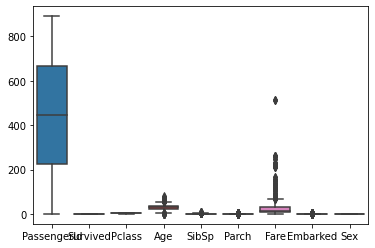

In [13]:
sns.boxplot(data = titanic_data5)

In [14]:
#Preparing data

X = titanic_data5.drop(columns=['Survived'])
y = titanic_data5['Survived']

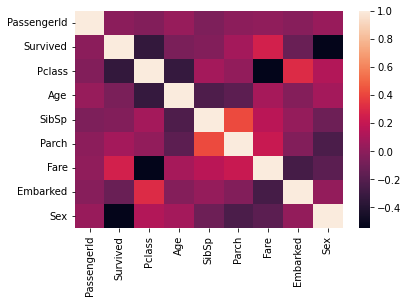

In [15]:
corr_train = titanic_data4.corr()
sns.heatmap(corr_train)
plt.show()

In [16]:
#Organizing Model

model = Sequential()
model.add(Dense(18, input_dim=8, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 18)                162       
                                                                 
 dense_1 (Dense)             (None, 20)                380       
                                                                 
 dense_2 (Dense)             (None, 15)                315       
                                                                 
 dense_3 (Dense)             (None, 8)                 128       
                                                                 
 dense_4 (Dense)             (None, 3)                 27        
                                                                 
 dense_5 (Dense)             (None, 1)                 4         
                                                                 
Total params: 1,016
Trainable params: 1,016
Non-trainabl

In [17]:
#Training

model.fit(X, y, epochs=320, batch_size=25)

Epoch 1/320
36/36 [==============================] - 1s 3ms/step - loss: 0.6936 - accuracy: 0.6175
Epoch 2/320
36/36 [==============================] - 0s 3ms/step - loss: 0.6880 - accuracy: 0.6175
Epoch 3/320
36/36 [==============================] - 0s 2ms/step - loss: 0.6510 - accuracy: 0.6175
Epoch 4/320
36/36 [==============================] - 0s 2ms/step - loss: 0.6635 - accuracy: 0.6175
Epoch 5/320
36/36 [==============================] - 0s 2ms/step - loss: 0.6533 - accuracy: 0.6175
Epoch 6/320
36/36 [==============================] - 0s 2ms/step - loss: 0.6811 - accuracy: 0.6175
Epoch 7/320
36/36 [==============================] - 0s 2ms/step - loss: 0.6747 - accuracy: 0.6175
Epoch 8/320
36/36 [==============================] - 0s 2ms/step - loss: 0.6614 - accuracy: 0.6175
Epoch 9/320
36/36 [==============================] - 0s 2ms/step - loss: 0.6555 - accuracy: 0.6175
Epoch 10/320
36/36 [==============================] - 0s 3ms/step - loss: 0.6368 - accuracy: 0.6175
Epoch 11/

36/36 [==============================] - 0s 2ms/step - loss: 0.5477 - accuracy: 0.7289
Epoch 84/320
36/36 [==============================] - 0s 2ms/step - loss: 0.5446 - accuracy: 0.7300
Epoch 85/320
36/36 [==============================] - 0s 2ms/step - loss: 0.5446 - accuracy: 0.7177
Epoch 86/320
36/36 [==============================] - 0s 2ms/step - loss: 0.5444 - accuracy: 0.7357
Epoch 87/320
36/36 [==============================] - 0s 2ms/step - loss: 0.5482 - accuracy: 0.7300
Epoch 88/320
36/36 [==============================] - 0s 2ms/step - loss: 0.5460 - accuracy: 0.7267
Epoch 89/320
36/36 [==============================] - 0s 2ms/step - loss: 0.5353 - accuracy: 0.7413
Epoch 90/320
36/36 [==============================] - 0s 3ms/step - loss: 0.5533 - accuracy: 0.7154
Epoch 91/320
36/36 [==============================] - 0s 2ms/step - loss: 0.5503 - accuracy: 0.7222
Epoch 92/320
36/36 [==============================] - 0s 2ms/step - loss: 0.5526 - accuracy: 0.7233
Epoch 93/320


36/36 [==============================] - 0s 3ms/step - loss: 0.4291 - accuracy: 0.8099
Epoch 246/320
36/36 [==============================] - 0s 3ms/step - loss: 0.4373 - accuracy: 0.8110
Epoch 247/320
36/36 [==============================] - 0s 3ms/step - loss: 0.4268 - accuracy: 0.8189
Epoch 248/320
36/36 [==============================] - 0s 3ms/step - loss: 0.4292 - accuracy: 0.8189
Epoch 249/320
36/36 [==============================] - 0s 3ms/step - loss: 0.4267 - accuracy: 0.8054
Epoch 250/320
36/36 [==============================] - 0s 3ms/step - loss: 0.4305 - accuracy: 0.8155
Epoch 251/320
36/36 [==============================] - 0s 3ms/step - loss: 0.4345 - accuracy: 0.8099
Epoch 252/320
36/36 [==============================] - 0s 3ms/step - loss: 0.4318 - accuracy: 0.8211
Epoch 253/320
36/36 [==============================] - 0s 4ms/step - loss: 0.4356 - accuracy: 0.8099
Epoch 254/320
36/36 [==============================] - 0s 3ms/step - loss: 0.4299 - accuracy: 0.8110
Epoc

In [18]:
#Accuracy Score

_,AccScore = model.evaluate(X, y)
print('The accuracy score is: %.4f' % (AccScore*100))

28/28 [==============================] - 1s 3ms/step - loss: 0.3942 - accuracy: 0.8256
The accuracy score is: 82.5647
